In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dfM2 = pd.read_csv('datasets/SA_Aqar.csv')
dfM2.head()

,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,...,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price,details
0,الرياض,حي العارض,شمال,250,0,5,5,1,1,1,...,0,0,1,0,1,1,0,0,80000,للايجار فيلا دبلكس في موقع ممتاز جدا بالقرب من...
1,الرياض,حي القادسية,جنوب,370,0,4,5,2,1,1,...,0,0,1,0,0,1,0,0,60000,*** فيلا درج مع الصالة جديدة ***\n\nعبارة عن م...
2,الرياض,حي القادسية,جنوب,380,0,4,5,1,1,1,...,1,0,1,0,0,1,0,0,60000,فيلا للايجار درج داخلي مشب خارجي مجلس مقلط وصا...
3,الرياض,حي المعيزلة,غرب,250,0,5,5,3,0,1,...,0,0,1,0,0,0,0,0,55000,فيلا للايجار جديده لن تستخدم ش...
4,الرياض,حي العليا,غرب,400,11,7,5,2,1,1,...,1,0,1,0,1,1,0,0,70000,فيلا للايجار حي العليا \n\nالارضي مجالس وغرفتي...


# EDA

In [3]:
to_replace = {"شمال": "north", "جنوب": "south", "غرب": "west","شرق":"east", "شمال شرقي":"northeast","جنوب شرقي":"south east"
             ,"3 شوارع":"street", "جنوب غربي":"southwest","شمال غربي":"northwest","4 شوارع":"street"}
dfM2.replace(to_replace=to_replace, inplace=True)
dfM2.head()

,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,...,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price,details
0,الرياض,حي العارض,north,250,0,5,5,1,1,1,...,0,0,1,0,1,1,0,0,80000,للايجار فيلا دبلكس في موقع ممتاز جدا بالقرب من...
1,الرياض,حي القادسية,south,370,0,4,5,2,1,1,...,0,0,1,0,0,1,0,0,60000,*** فيلا درج مع الصالة جديدة ***\n\nعبارة عن م...
2,الرياض,حي القادسية,south,380,0,4,5,1,1,1,...,1,0,1,0,0,1,0,0,60000,فيلا للايجار درج داخلي مشب خارجي مجلس مقلط وصا...
3,الرياض,حي المعيزلة,west,250,0,5,5,3,0,1,...,0,0,1,0,0,0,0,0,55000,فيلا للايجار جديده لن تستخدم ش...
4,الرياض,حي العليا,west,400,11,7,5,2,1,1,...,1,0,1,0,1,1,0,0,70000,فيلا للايجار حي العليا \n\nالارضي مجالس وغرفتي...


In [4]:
#checking null values
dfM2.isnull().sum()

city             0
district         0
front            0
size             0
property_age     0
bedrooms         0
bathrooms        0
livingrooms      0
kitchen          0
garage           0
driver_room      0
maid_room        0
furnished        0
ac               0
roof             0
pool             0
frontyard        0
basement         0
duplex           0
stairs           0
elevator         0
fireplace        0
price            0
details         80
dtype: int64

In [5]:
def get_info(_column, df):
    column_obj = eval(f'df.{_column}')
    print(f'min  of {_column} = {column_obj.min()}')
    print(f'max  of {_column} = {column_obj.max()}')
    print(f'mean of {_column} = {column_obj.mean()}')
    print(f'sdv  of {_column} = {column_obj.std()}')
    
    
def print_info(df: pd.DataFrame):
    numeric_columns = [var for var in df.select_dtypes(include=np.number) if len(df[var].value_counts()) > 2]
    for column in  numeric_columns:
        get_info(column, df)
        print()
        
#print_info(dfM2)

dfM2.describe()

,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,driver_room,maid_room,furnished,ac,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price
count,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3.718000e+03
mean,390.968531,5.064820,5.083916,4.606509,2.243948,0.909360,0.802044,0.495697,0.795320,0.123453,0.560785,0.521517,0.162453,0.802582,0.034158,0.499462,0.814416,0.080958,0.181280,8.738797e+04
std,1565.056135,7.590427,1.230040,0.703449,0.916436,0.287135,0.398512,0.500049,0.403522,0.329001,0.496358,0.499604,0.368915,0.398104,0.181660,0.500067,0.388823,0.272807,0.385302,7.063470e+04
min,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+03
25%,280.000000,0.000000,4.000000,4.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,5.500000e+04
50%,330.000000,2.000000,5.000000,5.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,7.000000e+04
75%,400.000000,7.000000,6.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000e+05
max,95000.000000,36.000000,7.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.700000e+06


# #size problem^

In [6]:
# print the binary columns values 
binary_columns = [var for var in dfM2.select_dtypes(include=np.number) if len(dfM2[var].value_counts()) == 2]
for column_name in binary_columns:
    print(column_name)
    value_counts = dfM2[column_name].value_counts()
    print(value_counts)

kitchen
1    3381
0     337
Name: kitchen, dtype: int64
garage
1    2982
0     736
Name: garage, dtype: int64
driver_room
0    1875
1    1843
Name: driver_room, dtype: int64
maid_room
1    2957
0     761
Name: maid_room, dtype: int64
furnished
0    3259
1     459
Name: furnished, dtype: int64
ac
1    2085
0    1633
Name: ac, dtype: int64
roof
1    1939
0    1779
Name: roof, dtype: int64
pool
0    3114
1     604
Name: pool, dtype: int64
frontyard
1    2984
0     734
Name: frontyard, dtype: int64
basement
0    3591
1     127
Name: basement, dtype: int64
duplex
0    1861
1    1857
Name: duplex, dtype: int64
stairs
1    3028
0     690
Name: stairs, dtype: int64
elevator
0    3417
1     301
Name: elevator, dtype: int64
fireplace
0    3044
1     674
Name: fireplace, dtype: int64


In [7]:
dfM2.drop(columns=['details','district','city'], axis=1 ,inplace=True)

In [8]:
# 1-north, south-2, west-3, east-4
#to_replace = {"north": "1", "south": "2", "west": "3","east":"1"}
#dfM2.replace(to_replace=to_replace, inplace=True)

In [9]:
dfM2['size'].mean()

390.96853146853147

# # Data visualization

Skewness: 7.690328
Kurtosis: 118.677936


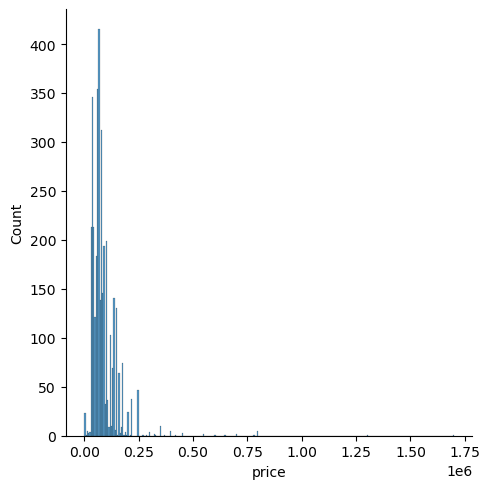

In [10]:
sns.displot(dfM2['price']);
#skewness and kurtosis
print("Skewness: %f" % dfM2['price'].skew())
print("Kurtosis: %f" % dfM2['price'].kurt())

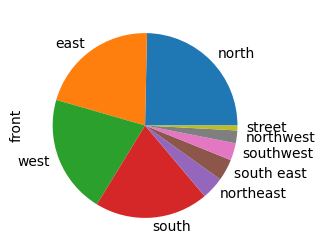

In [11]:
plt.subplots(figsize=(5,3))

#calculate the percentage of each education category.
dfM2.front.value_counts(normalize=True)

#plot the pie chart of education categories
dfM2.front.value_counts(normalize=True).plot.pie()
plt.show()

Skewness: 2.011501
Kurtosis: 3.870958


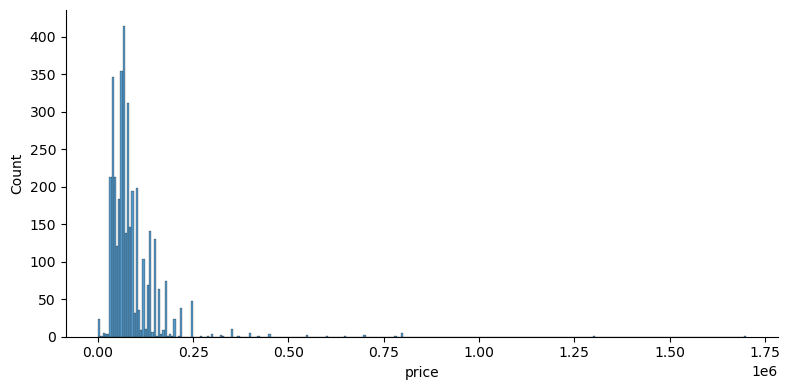

In [12]:
sns.displot(dfM2['price'],  height=4, aspect=2);
#skewness and kurtosis
print("Skewness: %f" % dfM2['property_age'].skew())
print("Kurtosis: %f" % dfM2['property_age'].kurt())

Skewness: 59.479436
Kurtosis: 3595.511080


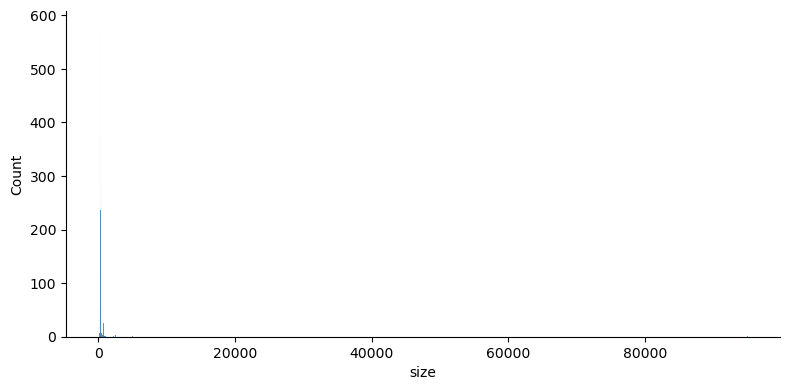

In [13]:
sns.displot(dfM2['size'],  height=4, aspect=2);

#skewness and kurtosis
print("Skewness: %f" % dfM2['size'].skew())
print("Kurtosis: %f" % dfM2['size'].kurt())

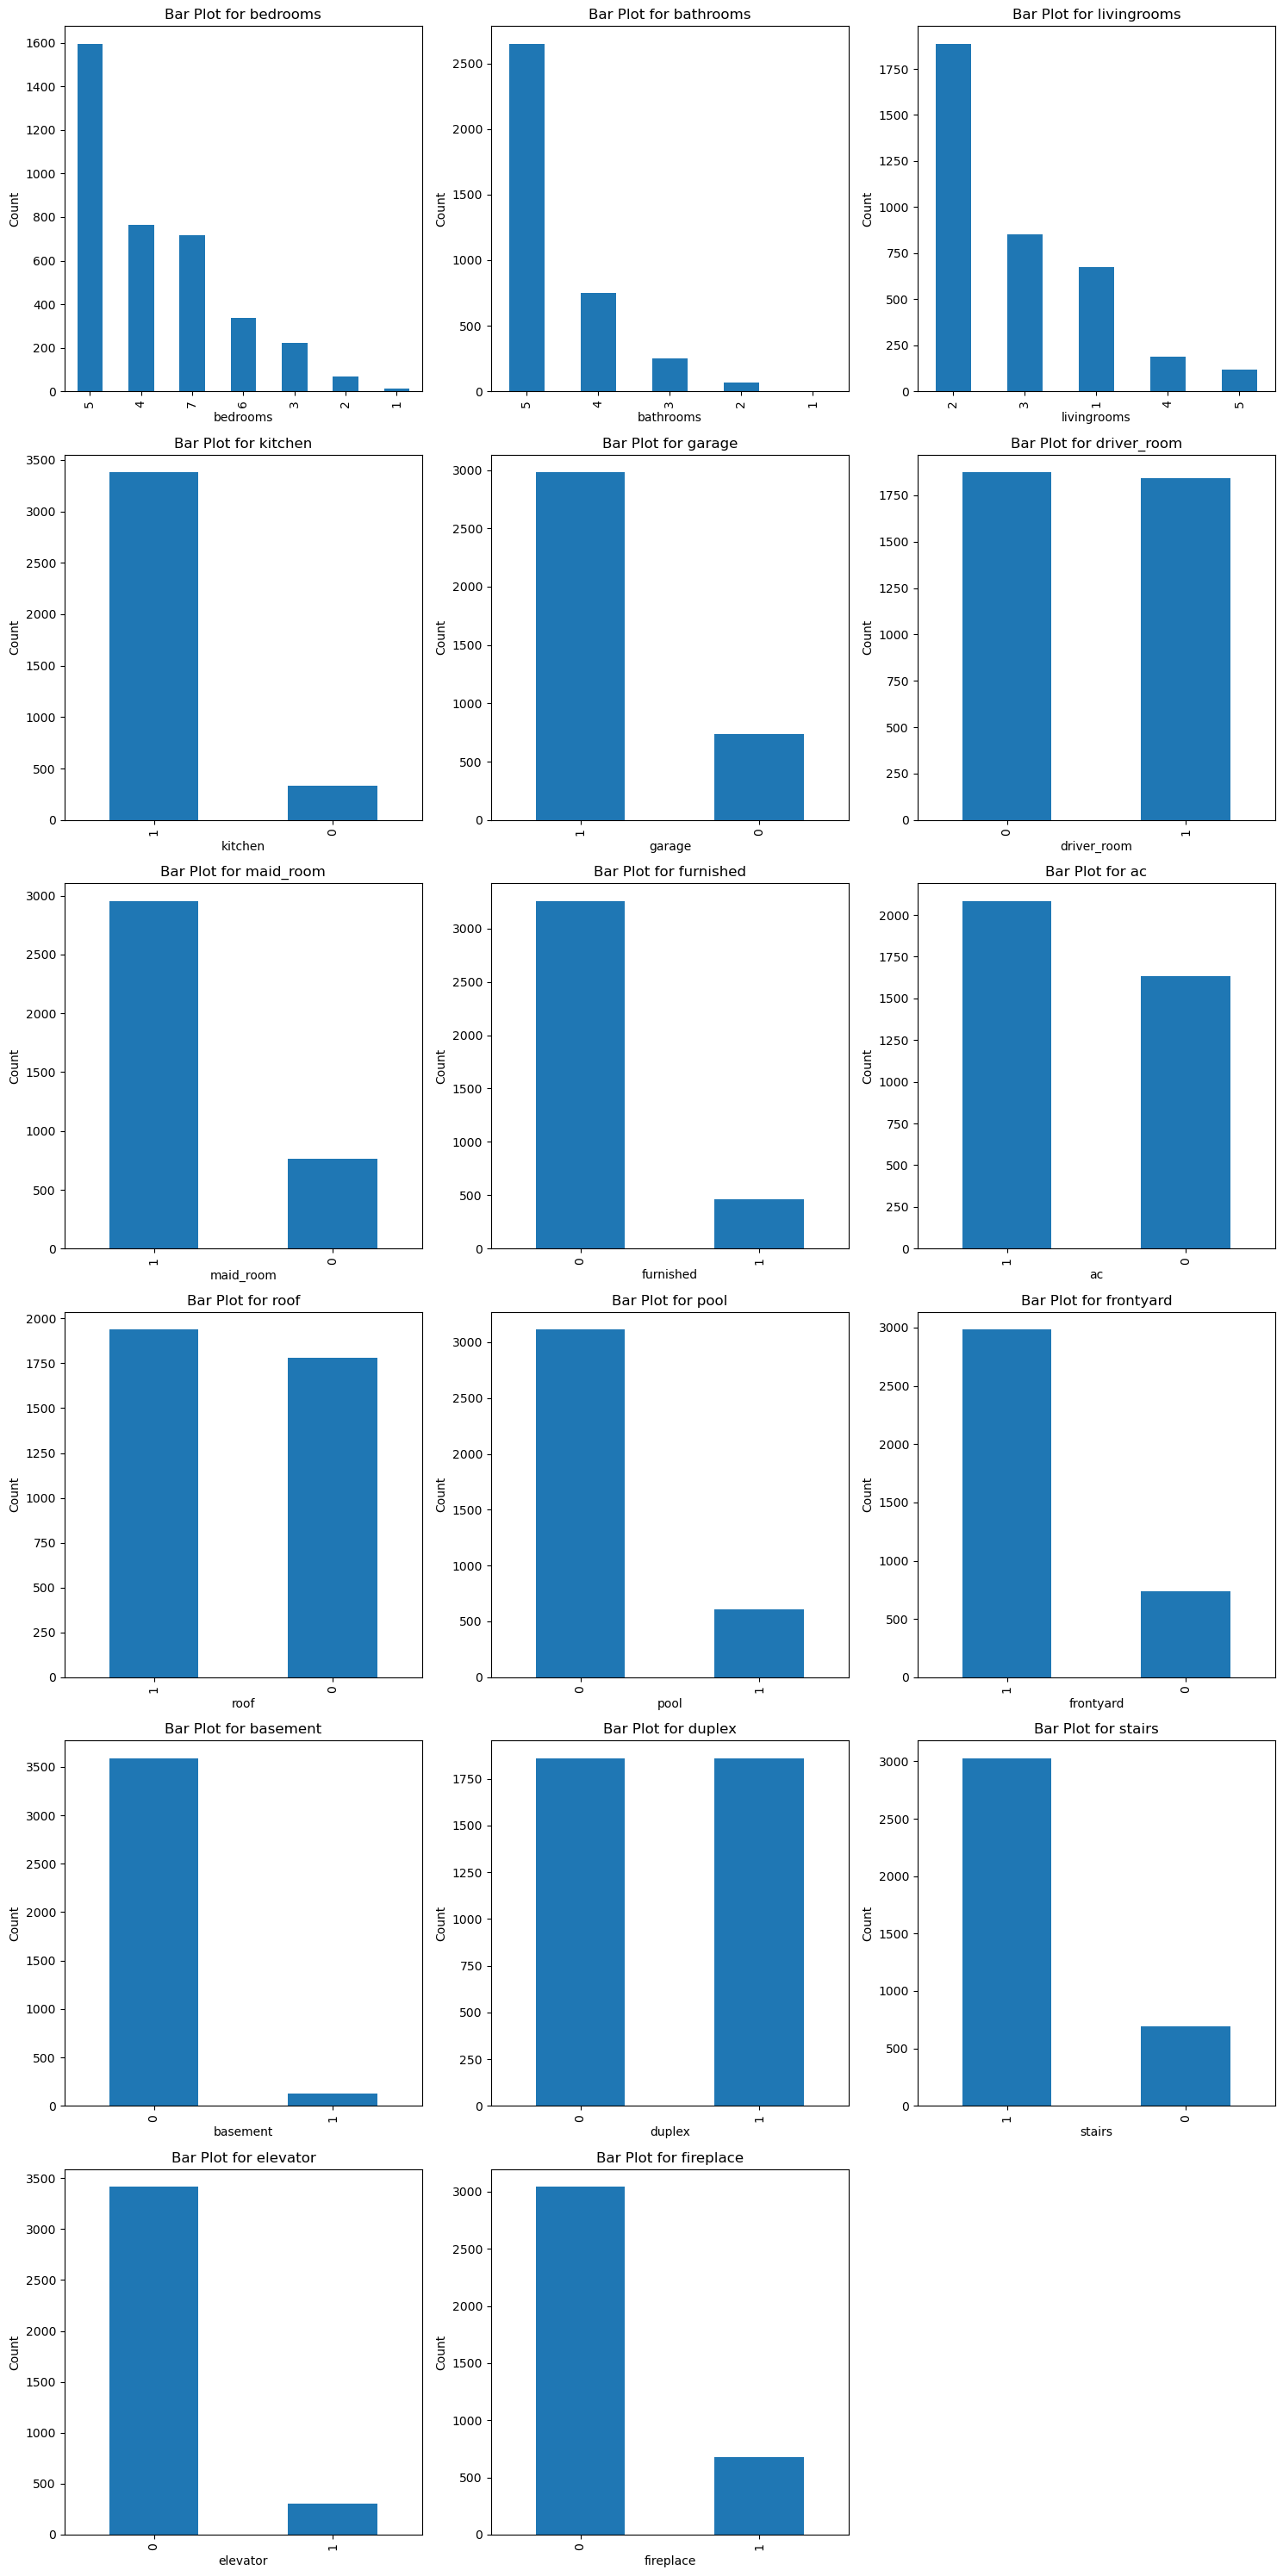

In [14]:
columns_to_plot = [col for col in dfM2.select_dtypes(include='number') if dfM2[col].nunique() < 10]

# Calculate the number of rows and columns for subplots
num_plots = len(columns_to_plot)
num_cols = min(num_plots, 3)  # Maximum 3 columns in one row
num_rows = (num_plots + num_cols - 1) // num_cols

# Create subplots and adjust figure size
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

for idx, column in enumerate(columns_to_plot):
    row_idx = idx // num_cols
    col_idx = idx % num_cols
    ax = axes[row_idx, col_idx] if num_rows > 1 else axes[col_idx]

    dfM2[column].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(f'Bar Plot for {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')

# Remove any empty subplots
for i in range(num_plots, num_rows * num_cols):
    if num_rows > 1:
        fig.delaxes(axes[i // num_cols, i % num_cols])
    else:
        fig.delaxes(axes[i])

plt.tight_layout()  # Ensure proper spacing between subplots
plt.show()

Skewness: 2.011501
Kurtosis: 3.870958


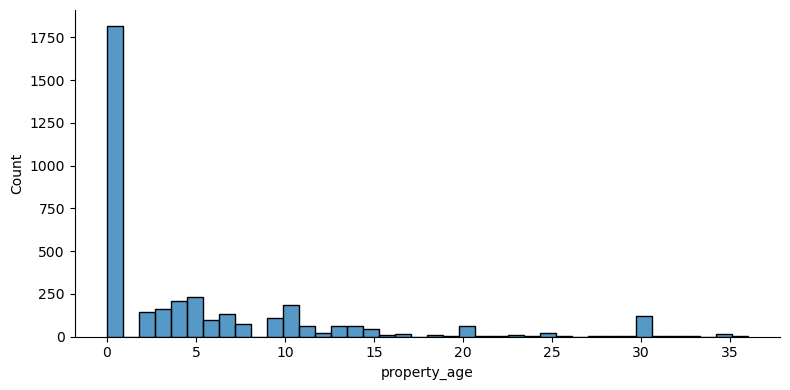

In [15]:
sns.displot(dfM2['property_age'],  height=4, aspect=2);

#skewness and kurtosis
print("Skewness: %f" % dfM2['property_age'].skew())
print("Kurtosis: %f" % dfM2['property_age'].kurt())

# Outliers

## price


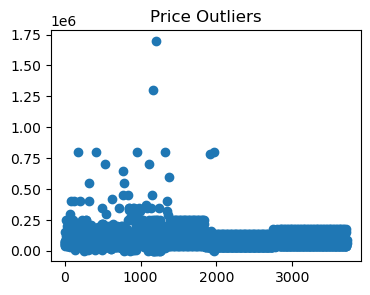

In [16]:
plt.figure(figsize=(4, 3)) 
plt.scatter(x=range(len(dfM2['price'])), y=dfM2['price'])
plt.title("Price Outliers")
plt.show()

In [17]:
from sklearn.ensemble import IsolationForest

X = dfM2[['price']]

iso_forest = IsolationForest(contamination=0.05) 
outliers = iso_forest.fit_predict(X)

dfM2 = dfM2[outliers != -1]

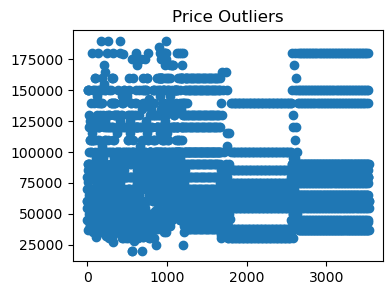

In [18]:
plt.figure(figsize=(4, 3)) 
plt.scatter(x=range(len(dfM2['price'])), y=dfM2['price'])
plt.title("Price Outliers")
plt.show()

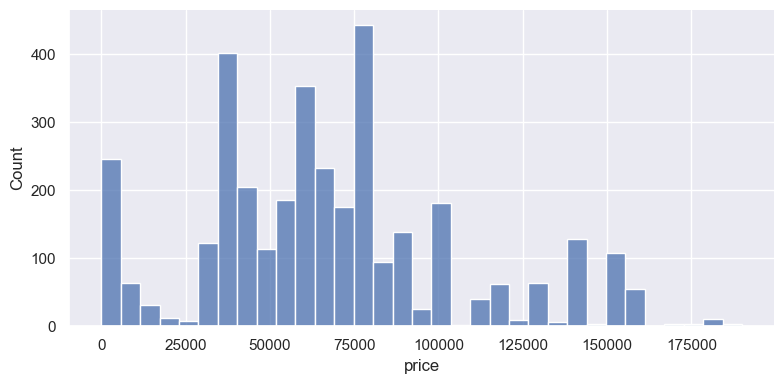

In [53]:
sns.displot(dfM2['price'],  height=4, aspect=2);

## size
We can see that the Skewness(59.479436) and Kurtosis(3595.511080) values are extremely high

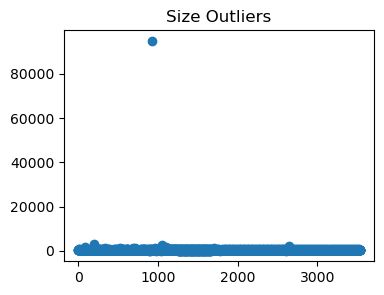

In [19]:
plt.figure(figsize=(4, 3)) 
plt.scatter(x=range(len(dfM2['size'])), y=dfM2['size'])
plt.title("Size Outliers")
plt.show()

In [20]:
#dfM2.drop( dfM2[dfM2['size'] == dfM2['size'].max()].index[0], inplace=True)
#dfM2.drop( dfM2[dfM2['size'] == dfM2['size'].max()].index[0], inplace=True)
dfM2.drop(index= dfM2['size'].nlargest(2).index, inplace=True)

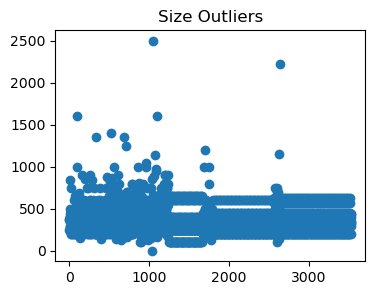

In [21]:
plt.figure(figsize=(4, 3)) 
plt.scatter(x=range(len(dfM2['size'])), y=dfM2['size'])
plt.title("Size Outliers")
plt.show()

Skewness: 3.404445
Kurtosis: 30.878901


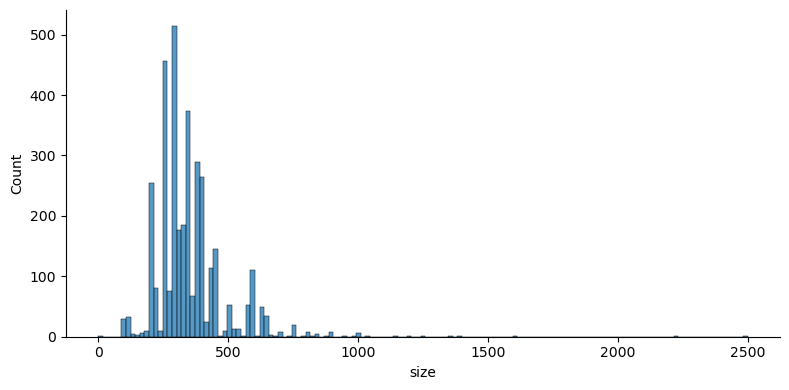

In [22]:
sns.displot(dfM2['size'],  height=4, aspect=2);

#skewness and kurtosis
print("Skewness: %f" % dfM2['size'].skew())
print("Kurtosis: %f" % dfM2['size'].kurt())

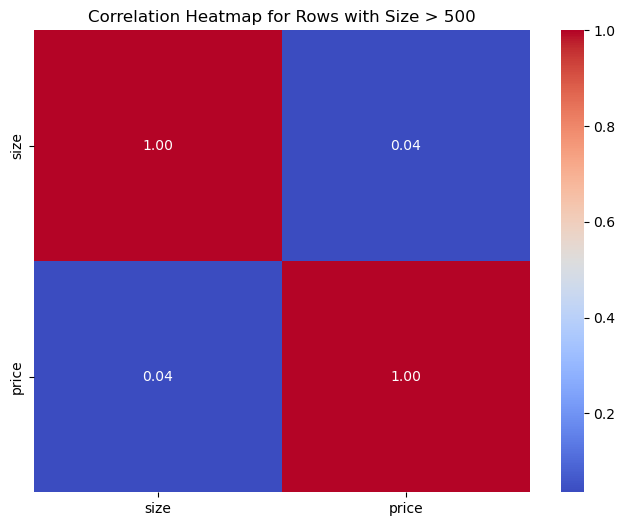

In [23]:
filtered_data = dfM2[dfM2['size'] > 500]

# Calculate the correlation matrix for the filtered data
correlation_matrix = filtered_data[['size', 'price']].corr()

# Create a correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap for Rows with Size > 500")
plt.show()

In [24]:
dfM2_copy = dfM2.copy()  # Make a copy of dfM2

# Filter the rows where "size" is greater than 500
above_500 = dfM2_copy[dfM2_copy['size'] > 500]

# Calculate the minimum and maximum sizes in this range
min_size = above_500['size'].min()
max_size = above_500['size'].max()

# Rescale the sizes to the new 0-500 m² scale
pd.options.mode.chained_assignment = None  # Suppress the warning
above_500['rescaled_size'] = (above_500['size'] - min_size) / (max_size - min_size) * 500
pd.options.mode.chained_assignment = 'warn'  # Revert the warning state

# Calculate the price per square meter for each apartment
pd.options.mode.chained_assignment = None  # Suppress the warning
above_500['price_per_meter'] = above_500['price'] / above_500['size']
pd.options.mode.chained_assignment = 'warn'  # Revert the warning state

# Adjust the prices based on the new rescaled size
pd.options.mode.chained_assignment = None  # Suppress the warning
above_500['adjusted_price'] = above_500['rescaled_size'] * above_500['price_per_meter']
pd.options.mode.chained_assignment = 'warn'  # Revert the warning state

# Drop the original 'size' and 'price' columns
above_500 = above_500.drop(columns=['size', 'price'])

# Rename the rescaled columns
above_500 = above_500.rename(columns={'rescaled_size': 'size', 'adjusted_price': 'price'})

above_500.drop(columns=['price_per_meter'], inplace=True)
dfM2 = dfM2[dfM2['size'] <= 500]
dfM2 = pd.concat([dfM2, above_500], ignore_index=True)


Skewness: -0.897304
Kurtosis: 0.492342


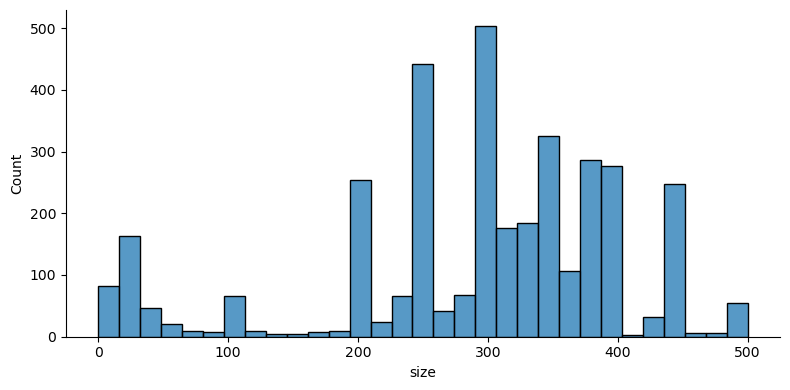

In [25]:
sns.displot(dfM2['size'],  height=4, aspect=2);

#skewness and kurtosis
print("Skewness: %f" % dfM2['size'].skew())
print("Kurtosis: %f" % dfM2['size'].kurt())

##-----------


<Axes: >

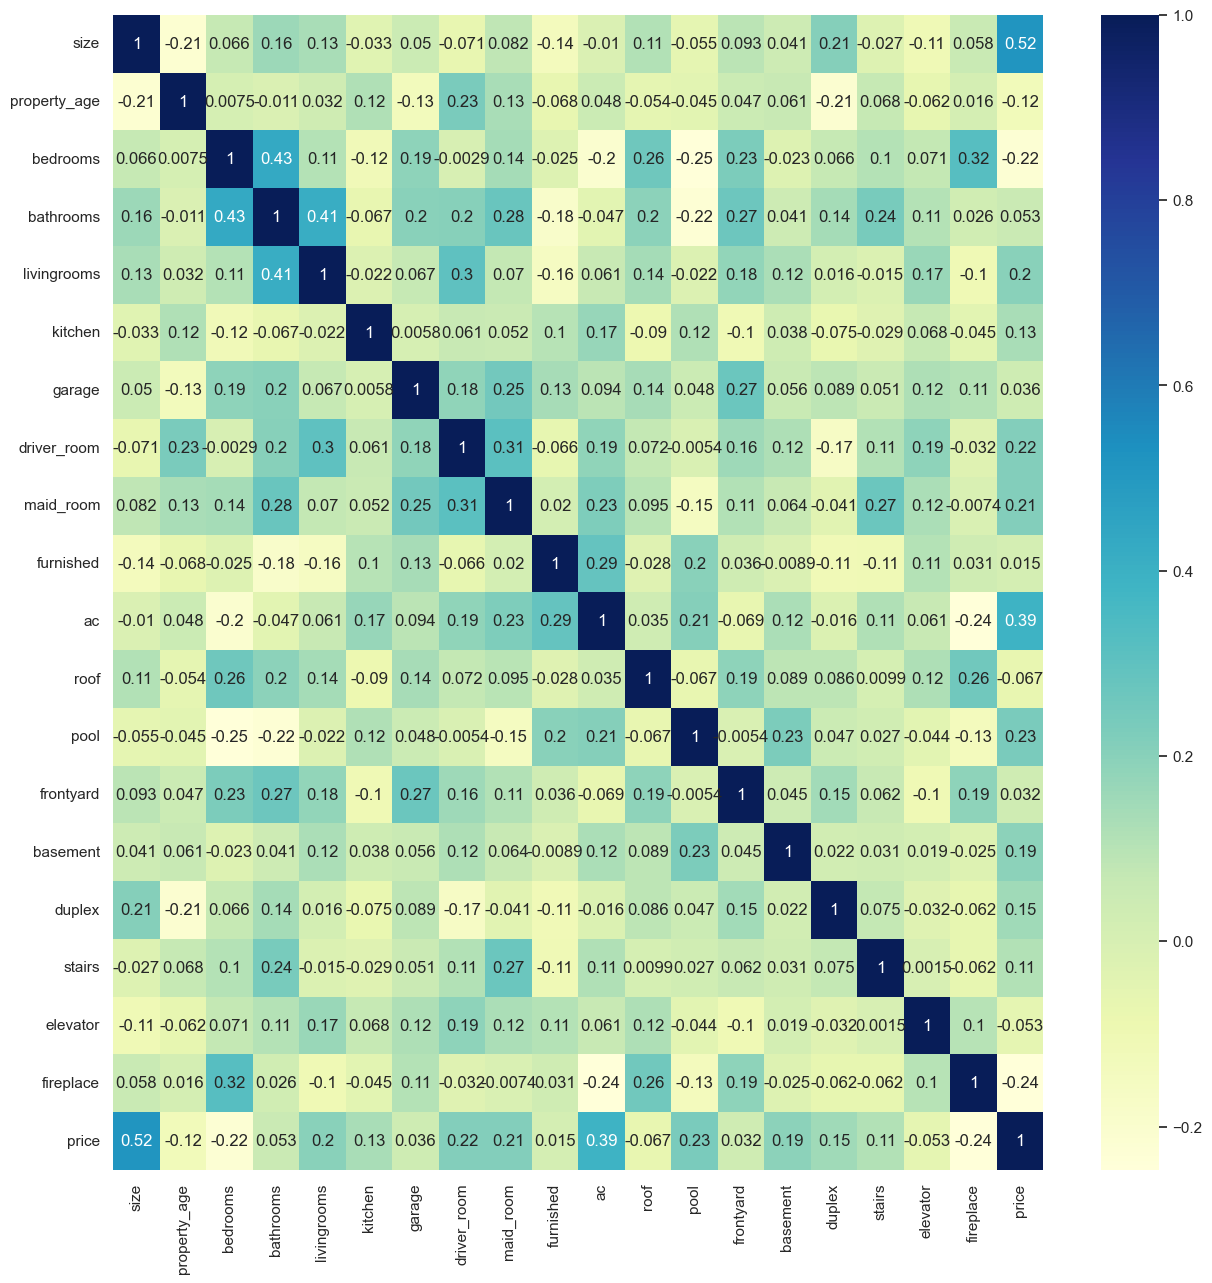

In [26]:
sns.set(rc = {'figure.figsize':(15,15)})
sns.heatmap(dfM2.corr(numeric_only=True), cmap='YlGnBu', annot=True)

In [27]:
to_replace = {"north":1, "south":2,"west":3,"east":4,"northeast":5,"south east":6 , "southwest":7,"northwest":8,"street":9}
dfM2.replace(to_replace=to_replace, inplace=True)

# Modeling

## Regression

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


df1 = dfM2.copy()

features = df1.drop('price', axis=1)  
target = df1['price']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20,random_state=42 )

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [29]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print('MAE:', mae)

mse = mean_squared_error(y_test, y_pred)
print('MSE:', mse)

r2score = r2_score(y_test, y_pred)
print('R^2 Score:', r2score)

MAE: 19436.025064005204
MSE: 656329920.5701581
R^2 Score: 0.5700920081081535


In [30]:
def correlation_trashold(df):
    correlation_df = df.corr(numeric_only=True)
    threshold = 0.1
    filtered = np.abs(correlation_df['price']) > threshold
    wanted_features = correlation_df.columns[filtered].tolist()
    return wanted_features

wanted_features = correlation_trashold(df1)
wanted_features

['front',
 'size',
 'property_age',
 'bedrooms',
 'livingrooms',
 'kitchen',
 'driver_room',
 'maid_room',
 'ac',
 'pool',
 'basement',
 'duplex',
 'stairs',
 'fireplace',
 'price']

In [31]:
df = df1.loc[:, wanted_features]

In [32]:
features = df.drop('price', axis=1)  
target = df['price']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [33]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print('MAE:', mae)

mse = mean_squared_error(y_test, y_pred)
print('MSE:', mse)

r2score = r2_score(y_test, y_pred)
print('R^2 Score:', r2score)

MAE: 19854.639567227678
MSE: 679259393.8928481
R^2 Score: 0.5423028781411383


In [34]:
def correlation_trashold(df):
    correlation_df = df.corr(numeric_only=True)
    threshold = 0.15
    filtered = np.abs(correlation_df['price']) > threshold
    wanted_features = correlation_df.columns[filtered].tolist()
    return wanted_features

wanted_features = correlation_trashold(df1)
wanted_features

['size',
 'bedrooms',
 'livingrooms',
 'driver_room',
 'maid_room',
 'ac',
 'pool',
 'basement',
 'duplex',
 'fireplace',
 'price']

In [35]:
df = df1.loc[:, wanted_features]

In [36]:
features = df.drop('price', axis=1)  
target = df['price']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20)

model = LinearRegression()

model.fit(X_train, y_train)


LinearRegression()

In [37]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print('MAE:', mae)

mse = mean_squared_error(y_test, y_pred)
print('MSE:', mse)

r2score = r2_score(y_test, y_pred)
print('R^2 Score:', r2score)

MAE: 18426.429983929334
MSE: 619426886.0354179
R^2 Score: 0.5685816671770738


In [38]:
from sklearn.preprocessing import PowerTransformer

def power_transformer(df):
    columns_to_concat = [col for col in df.columns if len(df[col].unique()) <= 2]
    columns_to_transform = [col for col in df.columns if len(df[col].unique()) > 2]
    pt = PowerTransformer(method='box-cox')
    transformed_data = pt.fit_transform(df[columns_to_transform] + 0.000001)
    transformed_df = pd.DataFrame(transformed_data, columns=columns_to_transform, index=df.index)
    result_df = pd.concat([transformed_df] + [df[columns_to_concat]], axis=1)
    return result_df


df1 = dfM2.copy()
power_transformer_df = pd.DataFrame(power_transformer(df1), columns=df1.columns)

In [39]:
features = power_transformer_df.drop('price', axis=1)  
target = power_transformer_df['price']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [40]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print('MAE:', mae)

mse = mean_squared_error(y_test, y_pred)
print('MSE:', mse)

r2score = r2_score(y_test, y_pred)
print('R^2 Score:', r2score)

MAE: 0.4841277192474945
MSE: 0.3973971651927223
R^2 Score: 0.5965668078814268


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split the data for test and train sets
def split_test_train_set(data):
    x, y = data.drop('price', axis=1), data['price']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)
    return x_train, x_test, y_train, y_test

In [42]:
x_train, x_test, y_train, y_test = split_test_train_set(power_transformer_df)

model = RandomForestRegressor(n_estimators=100, random_state=42)  
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [43]:
y_pred = model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error (MAE):', mae)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE):', mse)

r2score = r2_score(y_test, y_pred)
print('R-squared (R^2) Score:', r2score)

Mean Absolute Error (MAE): 0.18778127387092403
Mean Squared Error (MSE): 0.1726565869995993
R-squared (R^2) Score: 0.8317143034519231


In [44]:
#Mean Absolute Error (MAE): 0.09681022785458271
#Mean Squared Error (MSE): 0.09415878272285617
#R-squared (R^2) Score: 0.8839036932479197

## Classification


In [45]:
#binning equal depth
df2 = dfM2.copy()
df2['property_age'] = pd.cut(df2['property_age'], bins=3, labels=False)
df2['size'] = pd.cut(df2['size'], bins=10, labels=False)
df2['price'] = pd.cut(df2['price'], bins=50, labels=False)
x_train, x_test, y_train, y_test = split_test_train_set(df2)

In [46]:
clf = tree.DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [47]:
clf.score(x_test, y_test)

0.6732673267326733

In [48]:
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error (MAE):', mae)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE):', mse)

r2score = r2_score(y_test, y_pred)
print('R-squared (R^2) Score:', r2score)

Mean Absolute Error (MAE): 17.830623399500798
Mean Squared Error (MSE): 425.56186556788526
R-squared (R^2) Score: -2.904486616447718


In [64]:
#binning 
df3 = dfM2.copy()

df3['property_age'] = pd.cut(df3['property_age'], bins=3, labels=False)
df3['size'] = pd.cut(df3['size'], bins=5, labels=False)
#df['price'] = pd.cut(df['price'], bins=50, labels=False)
#x_train, x_test, y_train, y_test = split_test_train_set(df)



bin_width = 25000
min_price = df3['price'].min()
max_price = df3['price'].max()

num_bins = int(np.ceil((max_price - min_price) / bin_width))
bin_edges = np.arange(min_price, max_price + bin_width, bin_width)
bin_labels = [f'{int(bin_edges[i])}-{int(bin_edges[i + 1] - 1)}' for i in range(len(bin_edges) - 1)]
df3['price'] = pd.cut(df3['price'], bins=bin_edges, labels=bin_labels, include_lowest=True)


In [65]:
x_train, x_test, y_train, y_test = split_test_train_set(df3)
clf = tree.DecisionTreeClassifier(max_depth=7, min_samples_split=50)
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_split=50)

In [66]:
clf.score(x_test, y_test)

0.6760961810466761

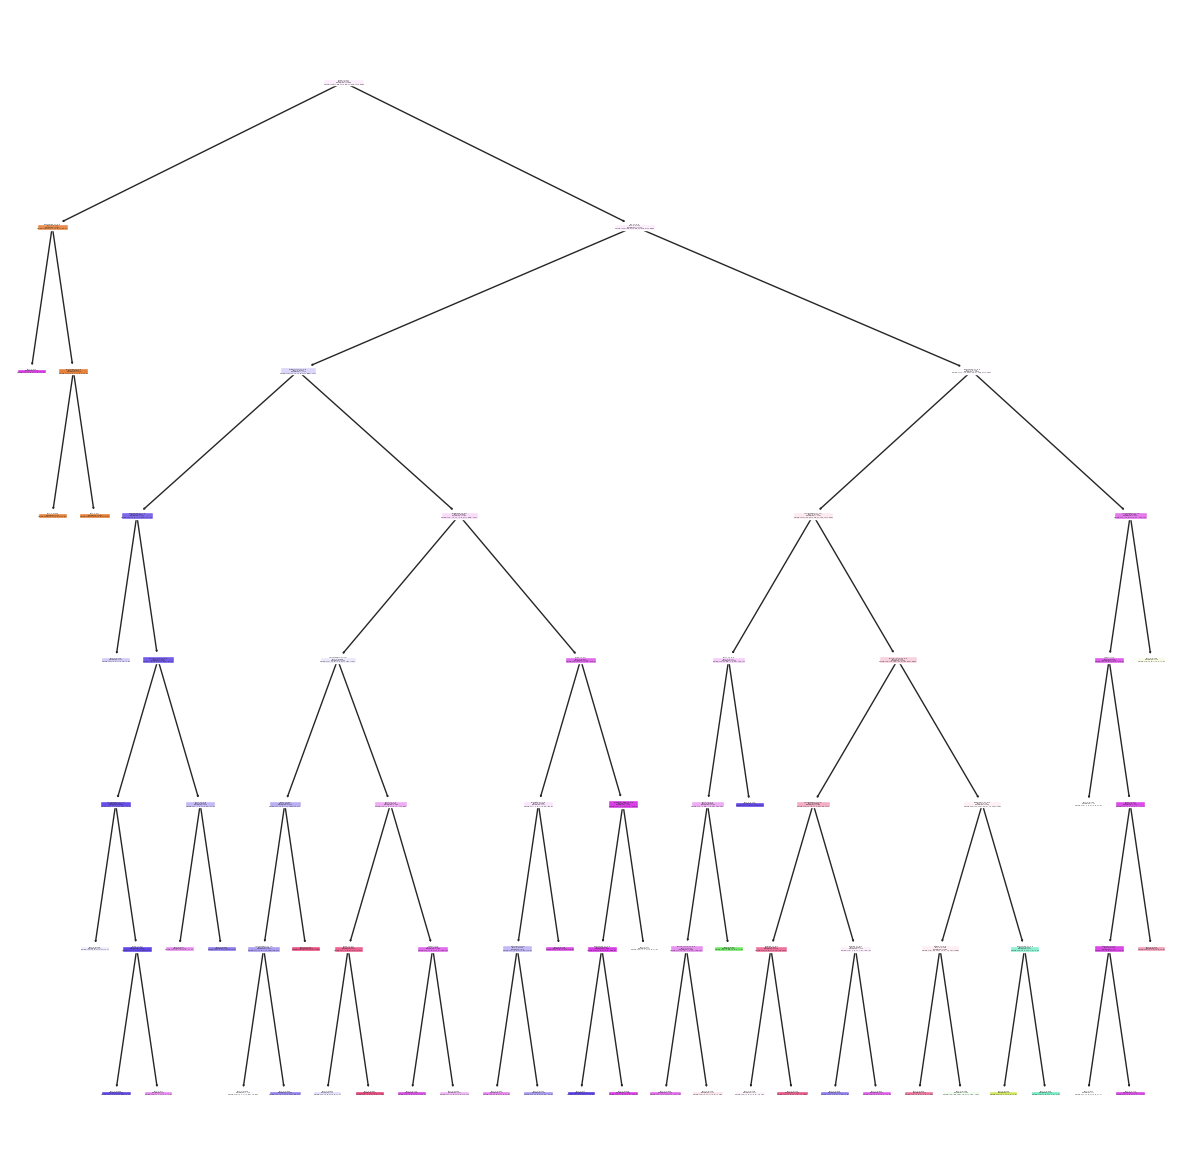

In [67]:
from sklearn.tree import export_text
import graphviz
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

feature_names_list = list(x_train.columns)

plt.figure()
#plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, feature_names=feature_names_list, class_names=None)
plt.show()


## Feedforward neural network

In [69]:
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

df5 = dfM2.copy()


X_train, X_test, y_train, y_test = split_test_train_set(df5)

# Standardize/Normalize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.3),  # Add dropout for regularization
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='linear')  # Use 'linear' activation for regression tasks
])

model.compile(optimizer='adam', loss='mean_squared_error')


ModuleNotFoundError: No module named 'tensorflow'

In [71]:
!pip install tensorflow

ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\user\\anaconda3\\Lib\\site-packages\\clang\\native\\libclang.dll'
Consider using the `--user` option or check the permissions.



  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/93/21/9b035a4f823d6aee2917c75415be9a95861ff3d73a0a65e48edbf210cec1/tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.15.0 from https://files.pythonhosted.org/packages/4c/48/1a5a15517f18eaa4ff8d598b1c000300b20c1bb0e624539d702117a0c369/tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/93/21/9b035a4f823d6aee2917c75415be9a95861ff3d73a0a65e48edbf210cec1/tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata (3.6 kB)
  Obtaining dependency information for tensorflow-intel==2.15.0 from https://files.pythonhosted.org/packages/4c/48/1a5a15517f18eaa4ff8d598b1c000300b20c1bb0e624539d702117a0c369/tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata (5.1 kB)
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Using cached absl_py-2.0.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Obtaining dependency information for flatbuffers>=23.5.26